In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


df = pd.read_csv("Spam_ham.csv",encoding='latin',engine='python')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df.isnull().sum()
df.duplicated().sum() 
df.drop_duplicates(keep='first') # loại bỏ trùng lặp
df.head()



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


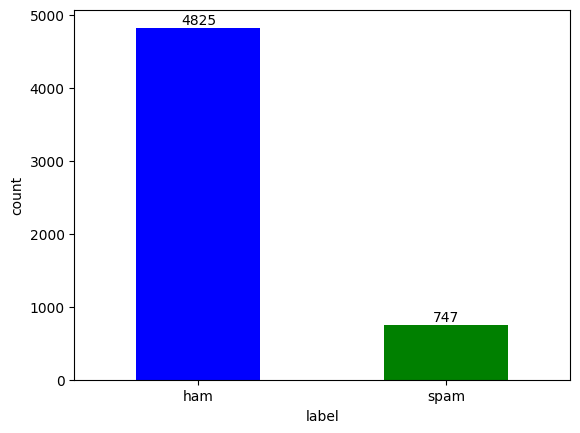

In [3]:

labels = df['label'].value_counts() 
colors = ['blue','green']
ax = labels.plot(kind='bar',color=colors)
ax.set_xlabel('label')
ax.set_ylabel("count")
ax.set_xticklabels(['ham','spam'], rotation=0)
for i, v in enumerate(labels):
    ax.text(i, v + 50, str(v), ha='center')
plt.show()

In [4]:
from nltk.tokenize import sent_tokenize

def count_word(input):
    new_input = (input.split(" "))
    return len(new_input)

def count_sentences(input):
    tokenize = sent_tokenize(input)
    return len(tokenize)
df['count_char'] = df['message'].apply(len)
df['count_word'] = df['message'].apply(lambda x:count_word(x))
df['count_sentences'] = df['message'].apply(lambda x: count_sentences(x))
df.head()



,label,message,count_char,count_word,count_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,message,count_char,count_word,count_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


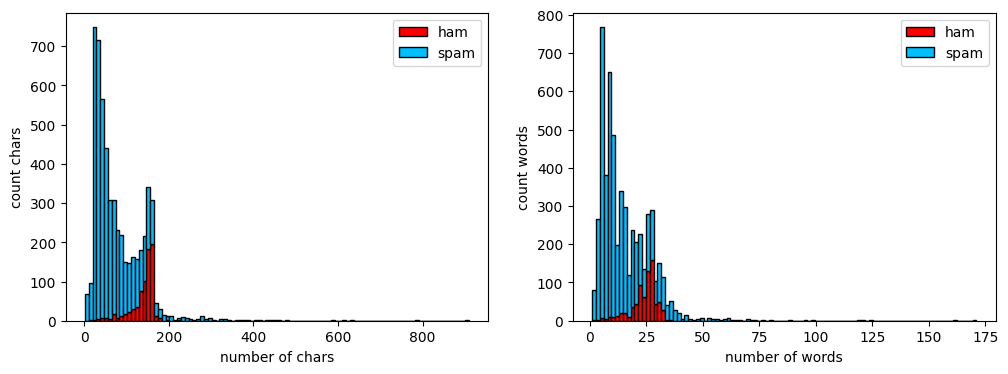

In [6]:
def draw_statis():
    fig,axs = plt.subplots(nrows=1,ncols=2,figsize =(12,4))
    axs[0].hist([df[df['label'] == 1]['count_char'],df[df['label'] == 0]['count_char']],bins=100,color=['red','deepskyblue'],edgecolor='black',stacked=True)
    axs[0].set_xlabel('number of chars')
    axs[0].set_ylabel('count chars')
    axs[0].legend(['ham','spam'])


    axs[1].hist([df[df['label'] == 1]['count_word'],df[df['label'] == 0]['count_word']],bins=100,color=['red','deepskyblue'],edgecolor='black',stacked=True)
    axs[1].set_xlabel('number of words')
    axs[1].set_ylabel('count words')
    axs[1].legend(['ham','spam'])
    plt.tight_layout
    plt.show()
draw_statis()

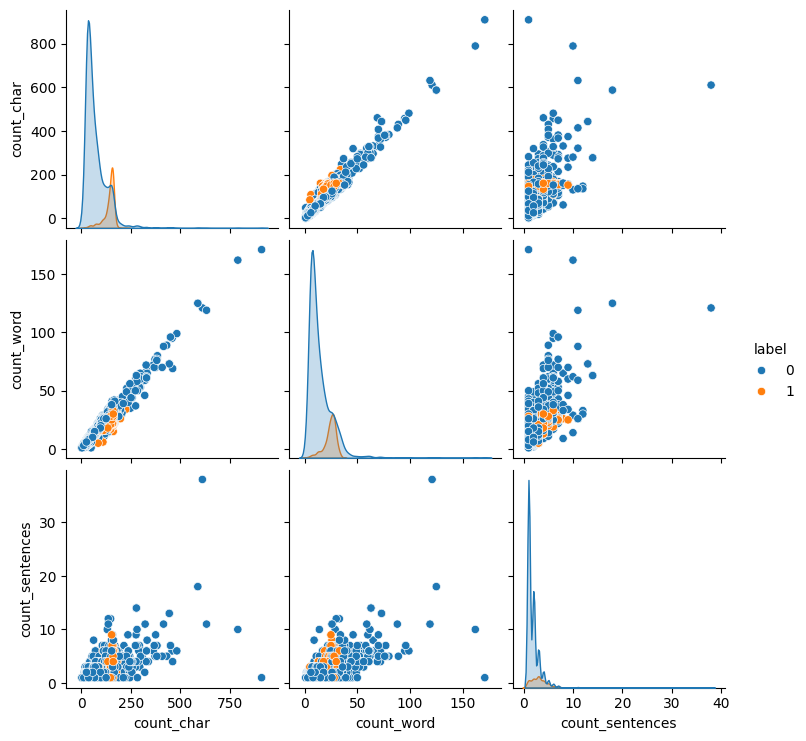

In [7]:
new_df = df.drop(columns=['message'],axis=1)
sns.pairplot(new_df,hue='label')
plt.show()

In [8]:
from Model import TextProgress
df['message'] = df['message'].apply(lambda x: TextProgress(x).convert_message())
df.head(5)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,count_char,count_word,count_sentences
0,0,go jurong point crazi avail bugi n great world...,111,20,2
1,0,ok lar joke wif u oni,29,6,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2
3,0,u dun say earli hor u c alreadi say,49,11,1
4,0,nah think goe usf live around though,61,13,1


In [9]:
from wordcloud import WordCloud,STOPWORDS
stop_words = set(STOPWORDS)
def cloud_ham_spam(ham_or_spam):
    wordcloud = WordCloud(width=800,height=800,background_color='white',min_font_size=10,stopwords=stop_words).generate(ham_or_spam)
    plt.figure(figsize=(8,8),facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout()
    plt.show()



In [14]:
def frequency_ham_spam(text):
    ham_list = text.split()
    frequen_ham_spam = {}
    for word in ham_list:
        if word in frequen_ham_spam:
            frequen_ham_spam[word] += 1
        else:
            frequen_ham_spam[word] = 1
    return frequen_ham_spam

def barplot_ham_spam(ham_or_spam):
    frequen_ham = sorted(frequency_ham_spam(ham_or_spam).items(),key=lambda x: x[1],reverse=True)
    words,frequency = zip(*frequen_ham)
    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(words[:15],frequency[:15])
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    for i in ax.patches:
        plt.text(i.get_width()+7, i.get_y()+0.25, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
    ax.set_title('The frequency of word ',
             loc ='left', )
 
 
    plt.show()

    


In [15]:
spam_words = " ".join(df[df['label']==1]['message'])
ham_words = " ".join(df[df['label']==0]['message'])

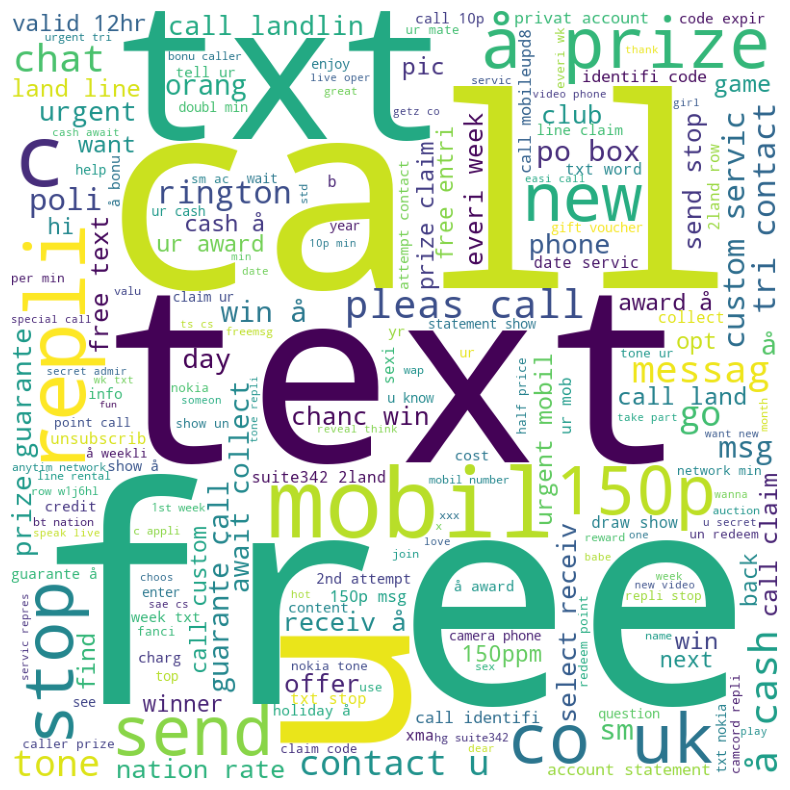

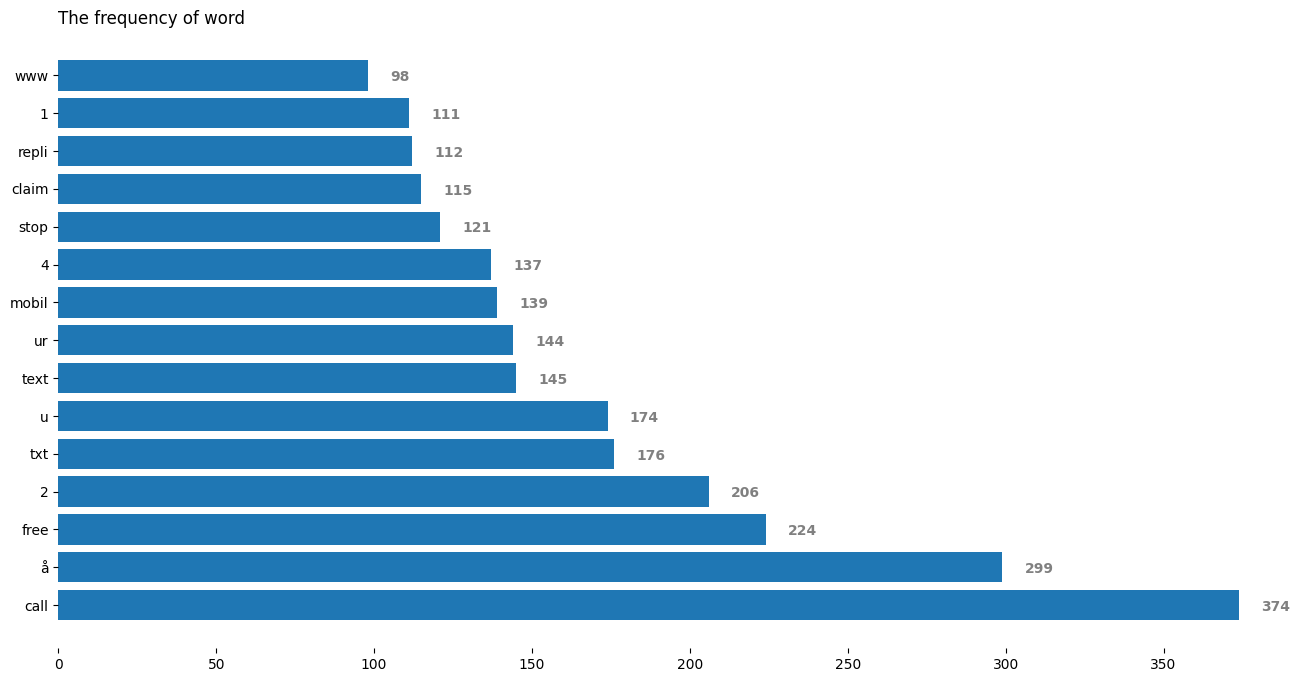

In [16]:
cloud_ham_spam(spam_words)
barplot_ham_spam(spam_words)


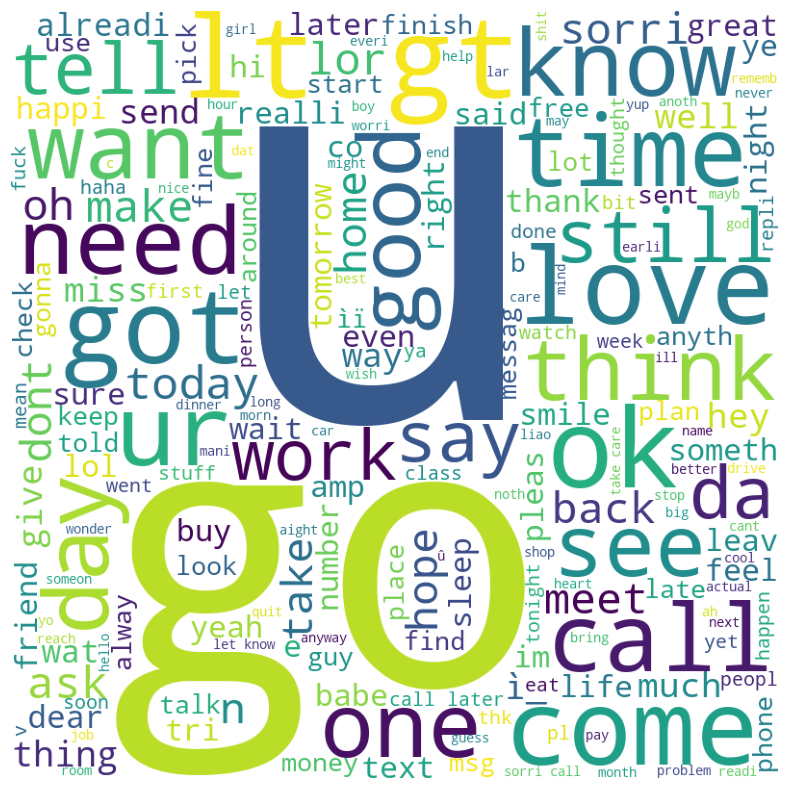

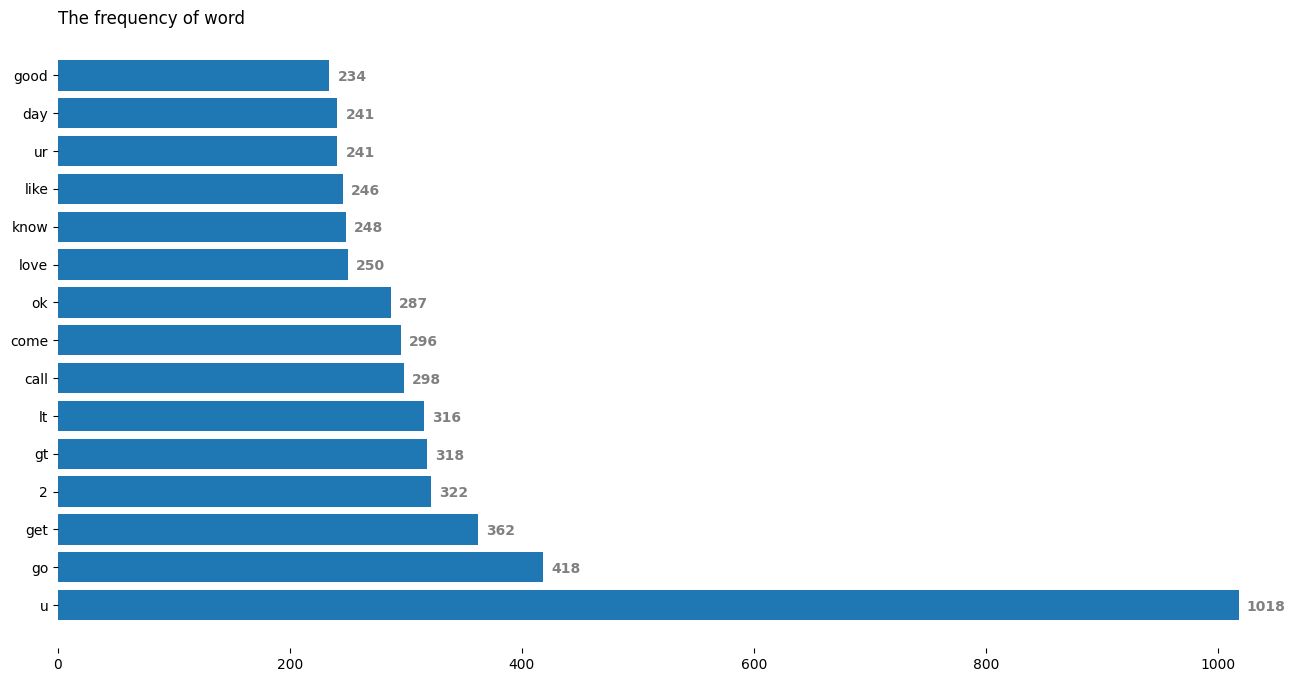

In [17]:
cloud_ham_spam(ham_words)
barplot_ham_spam(ham_words)